IMPORTING REQUIRED LIBRARIES

In [ ]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

THE KARATE CLUB GRAPH

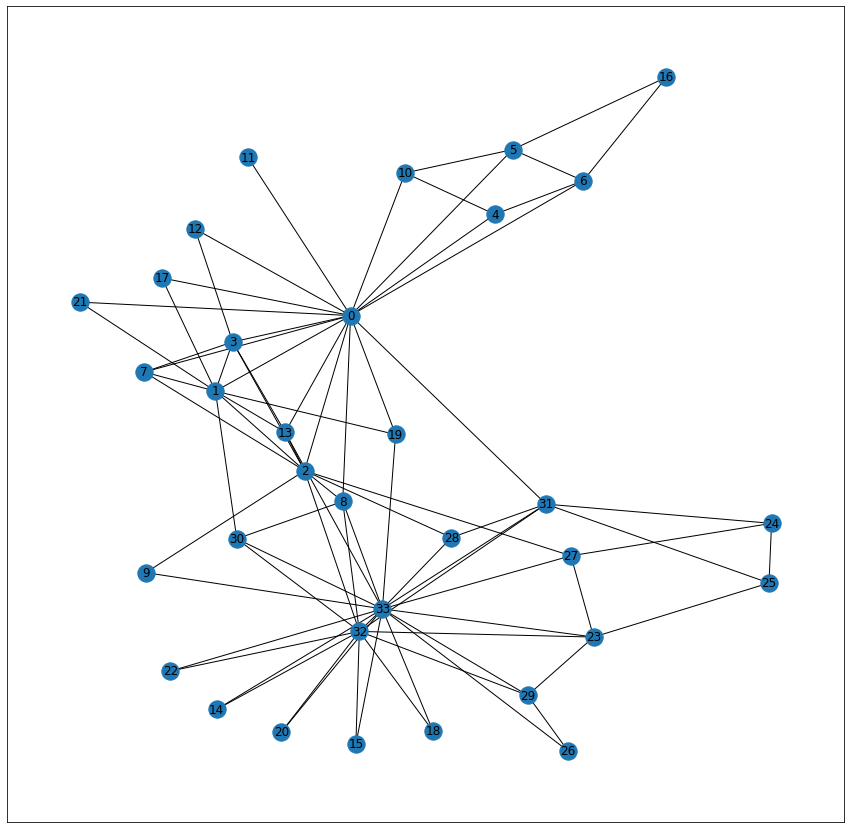

In [ ]:
G = nx.karate_club_graph()
plt.figure(figsize=(15,15))
nx.draw_networkx(G, with_labels=True)


LOUVAIN BEST PARTITION OF THE KARATE_CLUB_GRAPH

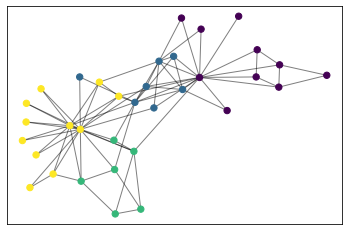

In [ ]:
#compute the best partition
partition = community_louvain.best_partition(G)
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
#plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G, pos, partition.keys(), label=True, node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

THE PARTITION DICTIONARY

In [ ]:
partition

{0: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 8: 3,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 1,
 14: 3,
 15: 3,
 16: 0,
 17: 0,
 18: 3,
 19: 1,
 20: 3,
 21: 0,
 22: 3,
 23: 2,
 24: 2,
 25: 2,
 26: 3,
 27: 2,
 28: 2,
 29: 3,
 30: 3,
 31: 2,
 32: 3,
 33: 3}

FORMING CLUSTERS

In [ ]:
cluster = [[],[],[],[]]
for i in partition:
  cluster[partition[i]].append(i)

In [ ]:
# Clusters and their nodes
var = 1
for i in cluster:
  print("Cluster ",var,"= ",i) 
  var+=1

Cluster  1 =  [0, 4, 5, 6, 10, 11, 12, 16, 17, 21]
Cluster  2 =  [1, 2, 3, 7, 9, 13, 19]
Cluster  3 =  [23, 24, 25, 27, 28, 31]
Cluster  4 =  [8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]


FORMING THE GRAPH MATRIX

In [ ]:
# making the graph matrix from Graph (G)
mat = nx.to_numpy_matrix(G)

In [ ]:
# printing the numpy matrix
mat

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

UNIFIABILITY

In [ ]:
# Unifiability of cluster C(i) and C(j)

def Unifiability(G,Ci,Cj,mat):

  sum1,sum2,sum3 = 0,0,0

  for i in Ci:
    for j in Cj:
      sum1+=int(mat[[i],[j]])

  for i in Ci:
    for j in G:
      sum2+=int(mat[[i],[j]])
    for j in Cj:
      sum2-=int(mat[[i],[j]])
  
  for i in Cj:
    for j in G:
      sum3+=int(mat[[i],[j]])
    for j in Ci:
      sum3-=int(mat[[i],[j]])

  return sum1/(sum2+sum3-sum1)

In [ ]:
# Unifiability between cluster1 and cluster2

Unifiability(G,cluster[0],cluster[1],mat)

0.17647058823529413

AVERAGE UNIFIABILITY

In [ ]:
def AVU(G,cluster,mat):
  
  # calling Unifiability for all clusters

  sum_unifiability = 0

  for i in cluster:
    for j in cluster:
      if i!=j:
        sum_unifiability += Unifiability(G,i,j,mat)

  return sum_unifiability/len(cluster)

In [ ]:
AVU_G = AVU(G=G,cluster=cluster,mat=mat)


In [ ]:
# AVU of graph G
AVU_G

0.22107155142758855

ISOLABILITY

In [ ]:
# Isolability of cluster C(i)

def Isolability(G,Ci,mat):

  sum1,sum2 = 0,0

  for i in Ci:
    for j in Ci:
        sum1+=int(mat[[i],[j]])

  for i in Ci:
    for j in G:
      if i!=j:
        sum2+=int(mat[[i],[j]])

  return sum1/(sum1+sum2)

In [ ]:
# Isolability of Cluster1
Isolability(G=G,Ci=cluster[0],mat=mat)

0.417910447761194

AVERAGE ISOLABILITY

In [ ]:
# AVI

def AVI(G,cluster,mat):

  sum = 0
  
  for i in cluster:
    sum += Isolability(G,i,mat)

  return sum/len(cluster)

In [ ]:
AVI_G = AVI(G,cluster,mat)

In [ ]:
# AVI of graph G

AVI_G

0.393129788247827

AVERAGE UNIFIABILITY AND ISOLABILITY

In [ ]:
# AUI 

def AUI(G,cluster,mat):
  avi = AVI(G,cluster,mat)
  avu = AVU(G=G,cluster=cluster,mat=mat)
  return (2*avi)/(1+avu*avi)

In [ ]:
AUI_G = AUI(G,cluster,mat)

In [ ]:
# AUI of graph G

AUI_G

0.7233898964477519

AVERAGE NORMALIZED UNIFIABILITY AND ISOLABILITY

In [ ]:
# ANUI

def ANUI(G,cluster,mat):
  return AUI(G,cluster,mat)/2

In [ ]:
ANUI_G = ANUI(G,cluster,mat)

In [ ]:
# ANUI of graph G

ANUI_G

0.36169494822387593

In [ ]:
import math

In [ ]:
!pip install cdlib
from cdlib import algorithms

USING THE SCAN ALGORITHM AS THE 2ND PARTITIONING METHOD

In [ ]:
G = nx.karate_club_graph()
com = algorithms.scan(G, epsilon=0.5, mu=0.1)
cluster = com.communities

In [ ]:
cluster

[[12, 3, 0, 1, 2, 7, 13, 17, 21],
 [26, 29, 23, 33, 27, 32, 8, 30],
 [5, 6, 4, 16, 10],
 [24, 25, 31, 28]]

INITIALISING THE TRUE LABEL DICTIONARY

In [ ]:
truelabel = {new_list: 5 for new_list in range(34)}
truelabel

ASSIGNING THE CLUSTERS TO THE COMMUNITIES

In [ ]:
for i in range(len(cluster)):
  for node in cluster[i]:
    truelabel[node] = i

FINDING THE NMI MEASURE

In [ ]:
## normalized mutual Information 
## NMI = 2*I(Y;C)/[H(Y)+H(C)]

def NMI(G,truelabel,predlabel,cluster):

  ## Entropy of class label
  prob = {}
  for i in G:
    if truelabel[i] in prob:
      prob[truelabel[i]] += 1.0
    else:
      prob[truelabel[i]] = 0.0

  u = []
  for i in prob:
    u.append(prob[i]/len(G)) 

  hy = 0.0
  for i in u:
    hy += (-i)*(math.log(i,2))

  ## Entropy of cluster label
  prob2 = {}
  for i in G:
    if predlabel[i] in prob2:
      prob2[predlabel[i]] += 1.0
    else:
      prob2[predlabel[i]] = 0.0

  v = []
  for i in prob2:
    v.append(prob2[i]/len(G))


  hc = 0.0
  for i in v:
    hc += (-i)*(math.log(i,2))
  
  print("hy\t:Entropy of class label\t\t\t = ",hy)
  print("hc\t:Entropy of cluster label\t\t = ",hc)

  ## Mutual Information

  
  hyc = 0.0
  for j in cluster:

    p = {}
    p.clear()
    for i in G:
      p[predlabel[i]]=0.0

    for i in j:

      if predlabel[i] == truelabel[i]:
        p[predlabel[i]]+= 1.0


    for i in p:
      p[i]=p[i]/len(j)
    
    temp = 0.0
    for i in p:
      if p[i] != 0:
        hyc -= p[i]*(math.log(p[i],2))

  iyc = hy -hyc
  print("hyc\t:Entropy of class label within cluster\t = ",hyc)
  print("iyc\t:Mutual Information\t\t\t = ",iyc)
  return print("\nNMI  = ",(2*iyc)/(hy+hc))

In [ ]:
# value of NMI for Louvian clustering of graph G

NMI(G,truelabel,partition,cluster)

hy	:Entropy of class label			 =  2.102310764273233
hc	:Entropy of cluster label		 =  1.8751724646144707
hyc	:Entropy of class label within cluster	 =  0.5199666673076944
iyc	:Mutual Information			 =  1.5823440969655385

NMI  =  0.7956509209005707


CLOSENESS CENTRALITY

In [ ]:
close_centrality=nx.closeness_centrality(G)
print(close_centrality)

{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}
